In [102]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- user parameters -------------------------------------------------------
tickers = {
    'Energy':'XLE','Materials':'XLB','Capital Goods':'IYJ',
    'Comm & Prof Svcs':'XLI','Transportation':'IYT',
    'Autos & Components':'CARZ','Cons Durables & Apparel':'IBUY',
    'Consumer Services':'PEJ','Retailing':'XRT',
    'Food & Staples Retail':'XLP','Food/Beverage/Tobacco':'PBJ',
    'Household & Pers Prod':'IYK','HC Equip & Svcs':'IHI',
    'Pharma / Biotech':'XPH','Banks':'KBE',
    'Diversified Financials':'IYF','Insurance':'KIE',
    'Real Estate':'XLRE','Software & Svcs':'IGV',
    'Tech Hardware & Equip':'IYW','Semis & Equip':'SOXX',
    'Telecom Svcs':'IYZ','Media & Entertainment':'PBS',
    'Utilities':'XLU'
}
start  = "2023-04-20"   # 1-yr look-back
end    = "2025-05-20"
# ---------------------------------------------------------------------------

# download Adj Close prices
assets = yf.download(list(tickers.values()), start=start, end=end)

assets_cols = set(assets.columns.get_level_values(0))
print(f"Available columns in yf assets: {assets_cols}")

asset_close = assets['Close']
asset_close.columns = tickers.keys()

[*********************100%***********************]  24 of 24 completed

Available columns in yf assets: {'Open', 'Volume', 'Low', 'High', 'Close'}


In [103]:
pct_returns = assets['Close'].pct_change().apply(lambda x: np.log1p(x)).dropna()

In [104]:
ticker_to_sector = {v: k for k, v in tickers.items()}

In [119]:
sorted_return_stds = pct_returns.std().sort_values(ascending=False)
labels = []
stds = []
for ticker, std in sorted_return_stds.items():
    labels.append(f"{ticker_to_sector[ticker]} [{ticker}]")
    stds.append(std)

In [120]:
pct_summary = pct_returns.describe()

In [121]:
pct_returns.columns = labels

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'Semis & Equip [SOXX]'),
  Text(2, 0, 'Banks [KBE]'),
  Text(3, 0, 'Cons Durables & Apparel [IBUY]'),
  Text(4, 0, 'Autos & Components [CARZ]'),
  Text(5, 0, 'Tech Hardware & Equip [IYW]'),
  Text(6, 0, 'Software & Svcs [IGV]'),
  Text(7, 0, 'Media & Entertainment [PBS]'),
  Text(8, 0, 'Retailing [XRT]'),
  Text(9, 0, 'Energy [XLE]'),
  Text(10, 0, 'Transportation [IYT]'),
  Text(11, 0, 'Consumer Services [PEJ]'),
  Text(12, 0, 'Pharma / Biotech [XPH]'),
  Text(13, 0, 'Real Estate [XLRE]'),
  Text(14, 0, 'Diversified Financials [IYF]'),
  Text(15, 0, 'Telecom Svcs [IYZ]'),
  Text(16, 0, 'Materials [XLB]'),
  Text(17, 0, 'Utilities [XLU]'),
  Text(18, 0, 'HC Equip & Svcs [IHI]'),
  Text(19, 0, 'Insurance [KIE]'),
  Text(20, 0, 'Capital Goods [IYJ]'),
  Text(21, 0, 'Comm & Prof Svcs [XLI]'),
  Text(22, 0, 'Food/Beverage/Tobacco [PBJ]'),
  Text(23, 0, 'Household &

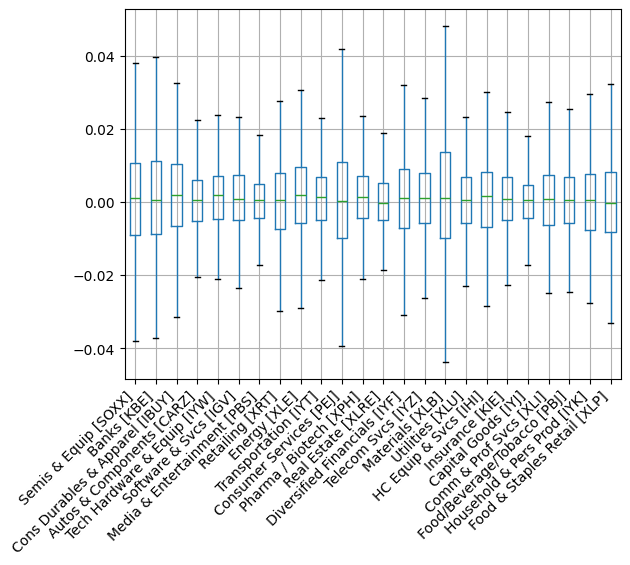

In [133]:
pct_returns.boxplot(showfliers=False)
plt.xticks(rotation=45, ha='right')

<Axes: >

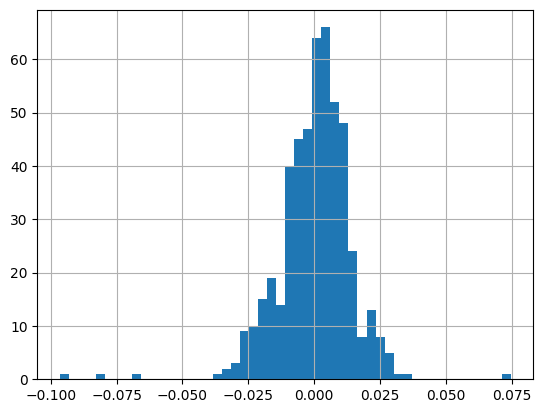

In [98]:
pct_returns['XLE'].hist(bins=50)

([<matplotlib.axis.XTick at 0x14d782850>,
 [Text(0, 0, 'Semis & Equip [SOXX]'),
  Text(1, 0, 'Banks [KBE]'),
  Text(2, 0, 'Autos & Components [CARZ]'),
  Text(3, 0, 'Cons Durables & Apparel [IBUY]'),
  Text(4, 0, 'Tech Hardware & Equip [IYW]'),
  Text(5, 0, 'Software & Svcs [IGV]'),
  Text(6, 0, 'Retailing [XRT]'),
  Text(7, 0, 'Media & Entertainment [PBS]'),
  Text(8, 0, 'Energy [XLE]'),
  Text(9, 0, 'Consumer Services [PEJ]'),
  Text(10, 0, 'Transportation [IYT]'),
  Text(11, 0, 'Pharma / Biotech [XPH]'),
  Text(12, 0, 'Real Estate [XLRE]'),
  Text(13, 0, 'Diversified Financials [IYF]'),
  Text(14, 0, 'Materials [XLB]'),
  Text(15, 0, 'HC Equip & Svcs [IHI]'),
  Text(16, 0, 'Utilities [XLU]'),
  Text(17, 0, 'Telecom Svcs [IYZ]'),
  Text(18, 0, 'Insurance [KIE]'),
  Text(19, 0, 'Capital Goods [IYJ]'),
  Text(20, 0, 'Comm & Prof Svcs [XLI]'),
  Text(21, 0, 'Food/Beverage/Tobacco [PBJ]'),
  Text(22, 0, 'Household & Pers Prod [IYK]'),
  Text(23, 0, 'Food & Staples Retail [XLP]')])

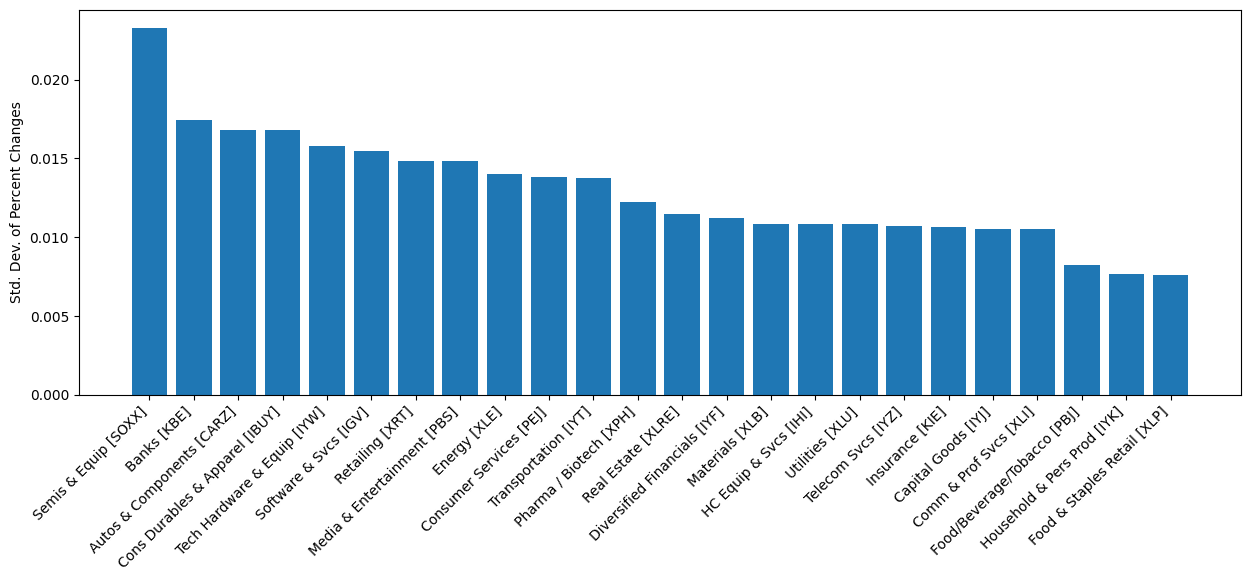

In [94]:
plt.figure(figsize=(15,5))
plt.bar(range(len(stds)), stds)
plt.ylabel("Std. Dev. of Percent Changes")
plt.xticks(range(len(stds)), labels, rotation=45, ha='right')

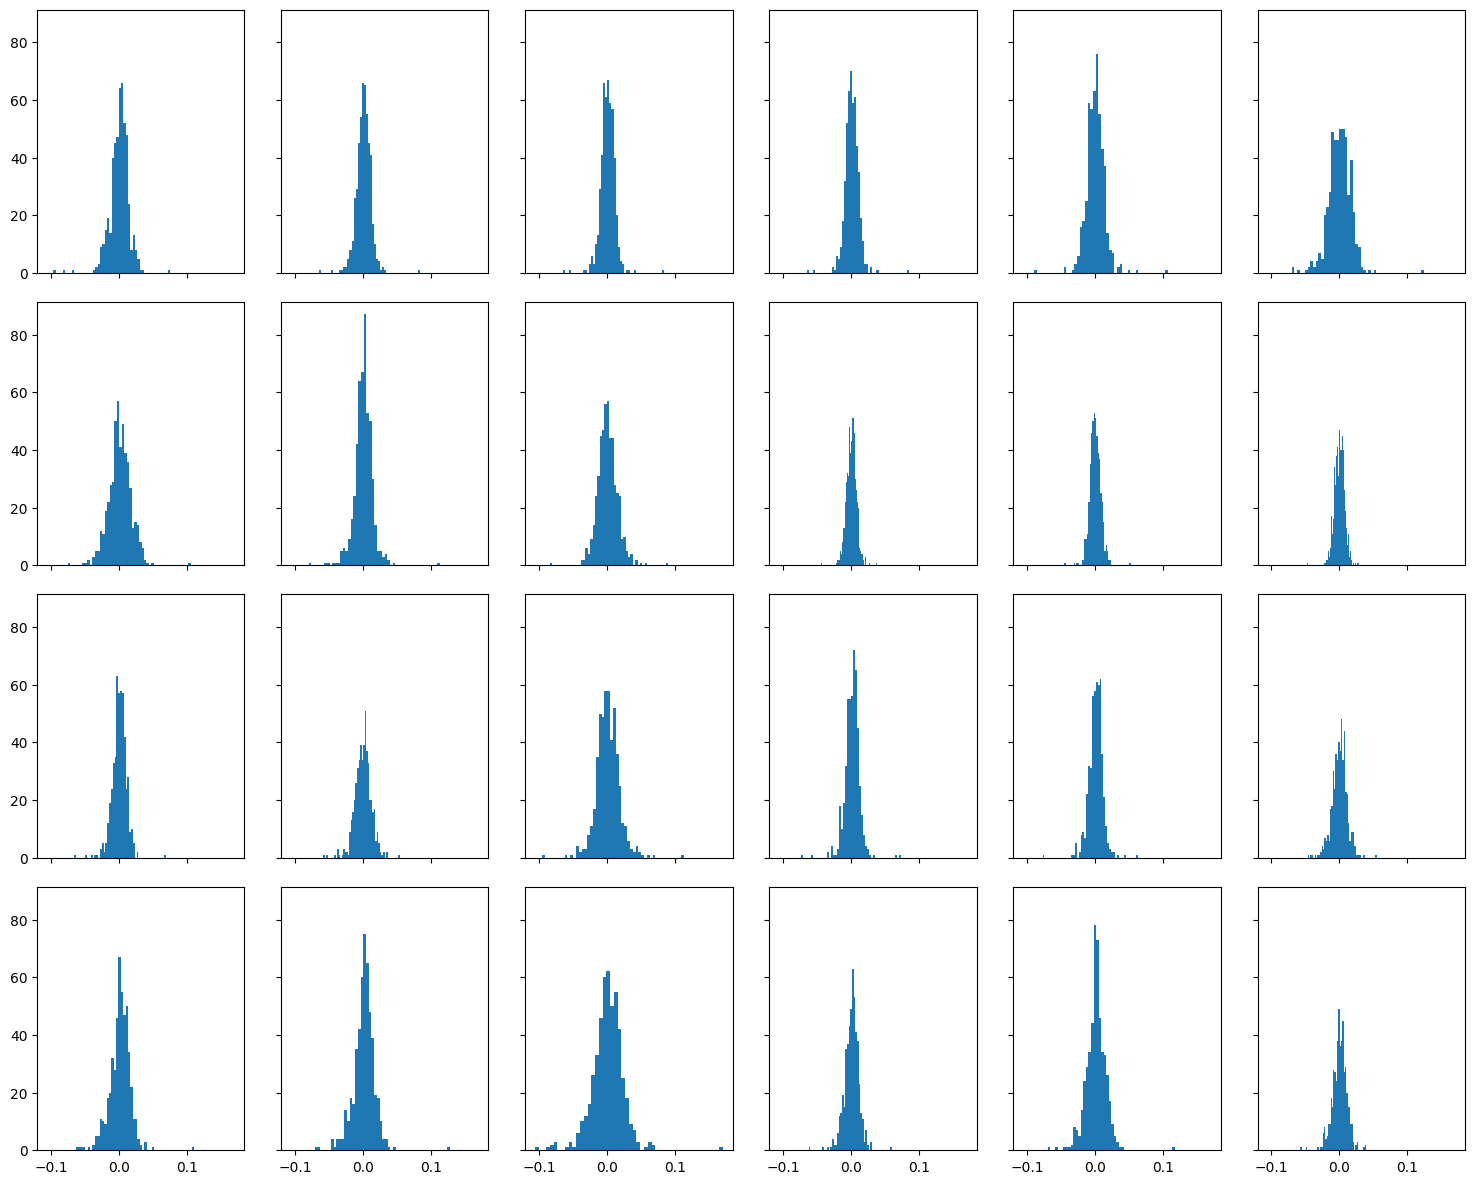